<a href="https://colab.research.google.com/github/blaisely/svm_wine/blob/main/SVR_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns = housing.feature_names)
housing_df['target'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**DATA EXPLORATION**

In [3]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [4]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
corr = housing_df.corr()
corr['target'].sort_values(ascending = False)

,target
target,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


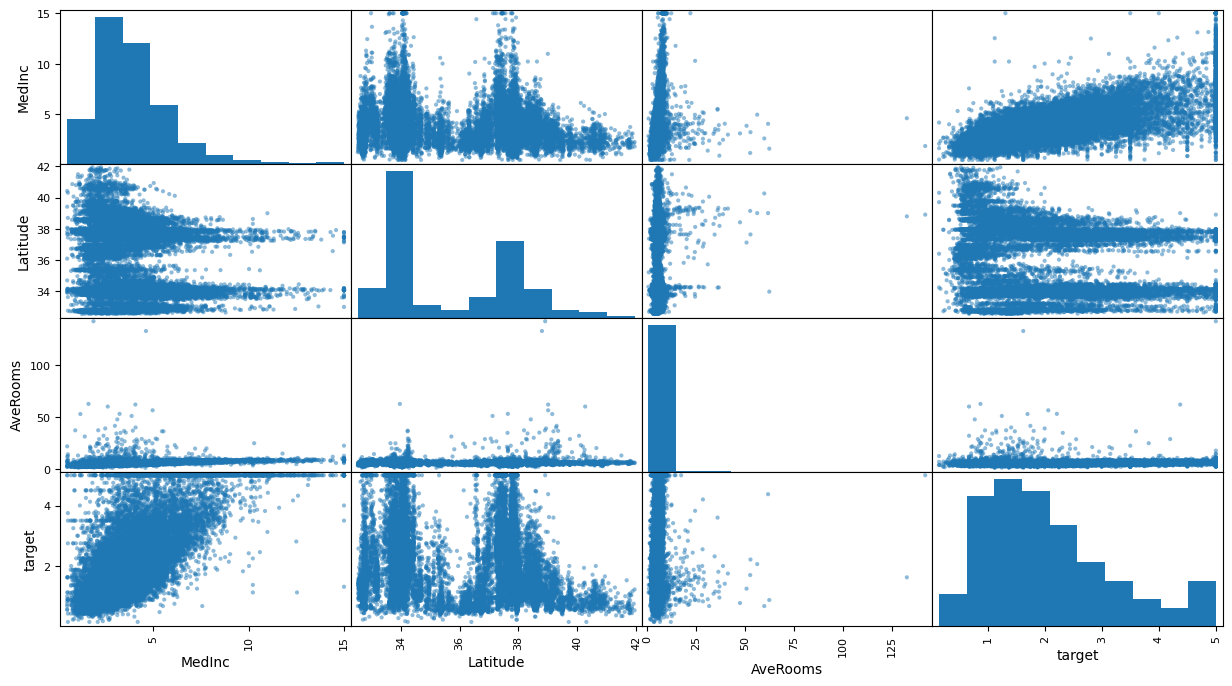

In [9]:
labels = ["MedInc", "Latitude", "AveRooms", 'target']
from pandas.plotting import scatter_matrix
scatter_matrix(housing_df[labels], figsize=(15,8))
plt.show()

In [10]:
housing_copy = housing_df.copy()
housing_copy["BedroomRatio"] = housing_copy["AveBedrms"]/housing_copy["AveRooms"]
housing_copy["RoomsPerPerson"] = housing_copy["AveRooms"]/housing_copy["AveOccup"]
housing_copy.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,BedroomRatio,RoomsPerPerson
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.146591,2.732919
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.155797,2.956685
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.129516,2.957661
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.184458,2.283154
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.172096,2.879646


In [11]:
corr = housing_copy.corr()
corr['target'].sort_values(ascending = False)

,target
target,1.000000
MedInc,0.688075
RoomsPerPerson,0.209482
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


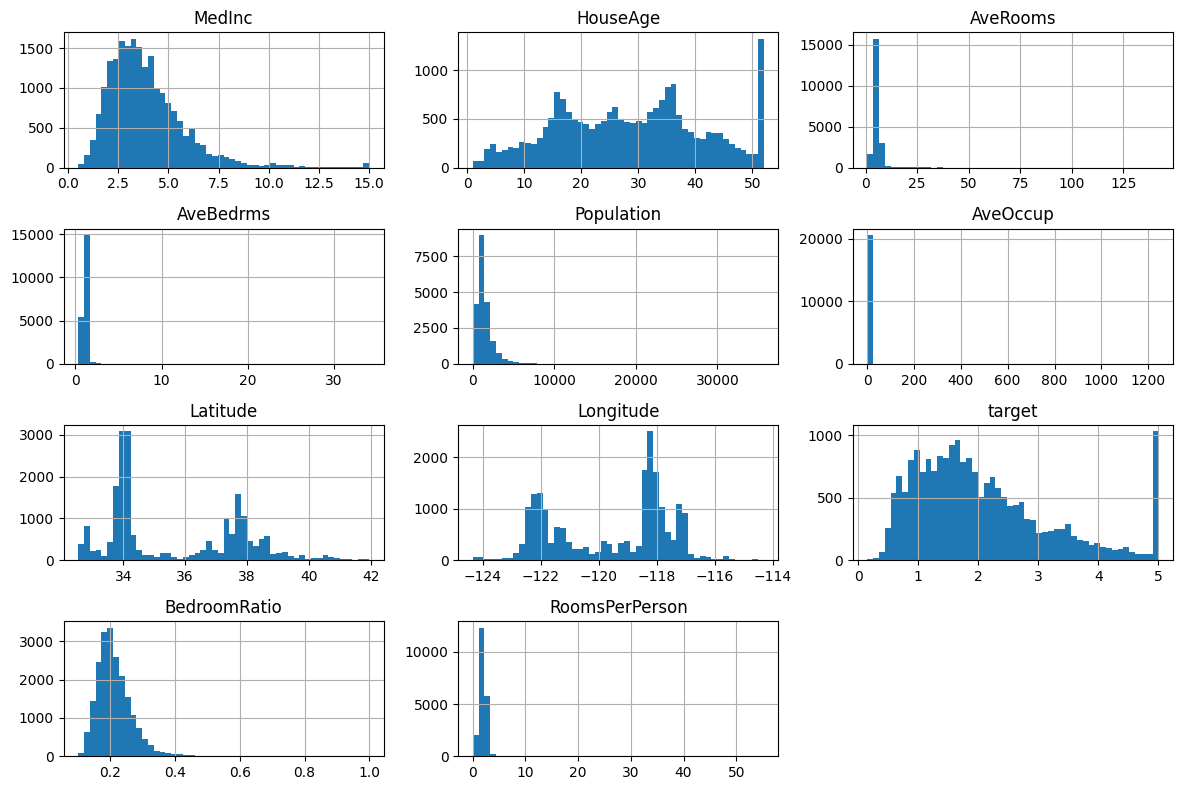

In [12]:
housing_copy.hist(bins=50,figsize=(12,8))
plt.tight_layout()
plt.show()
#might log MedInc, definitely scale

In [4]:
from sklearn.model_selection import train_test_split

y = housing_df['target'].copy()
X = housing_df.drop('target', axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

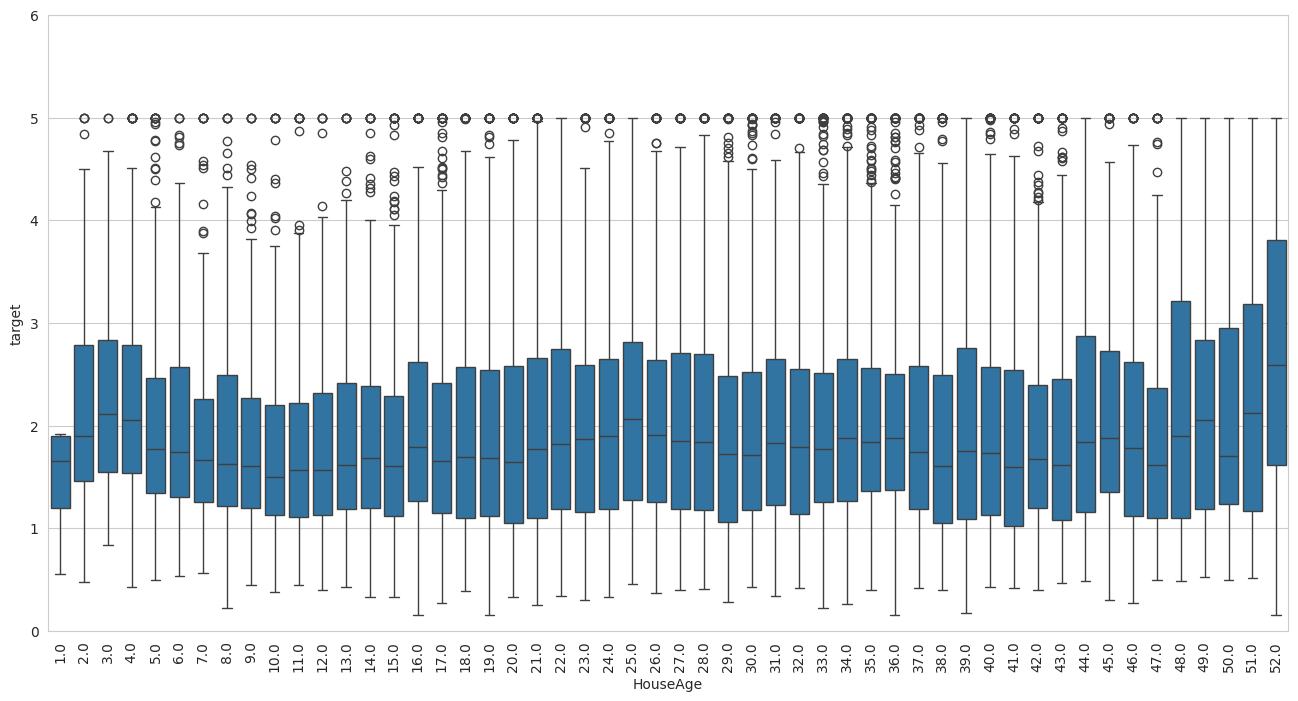

In [23]:
var = 'HouseAge'
data = pd.concat([housing_df['target'], housing_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="target", data=data)
fig.axis(ymin=0, ymax=6);
plt.xticks(rotation=90);

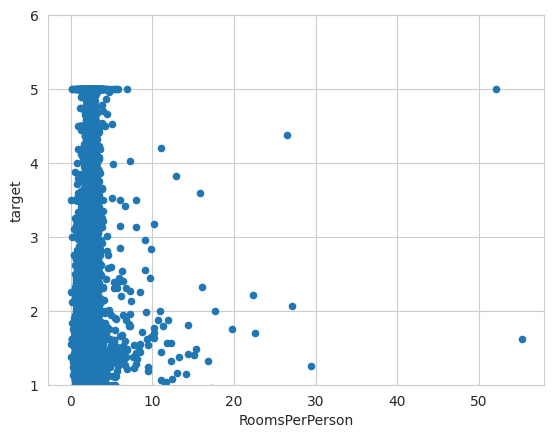

In [29]:
var = 'RoomsPerPerson'
data = pd.concat([housing_copy['target'], housing_copy[var]], axis=1)
data.plot.scatter(x=var, y='target', ylim=(1,6));

<Axes: >

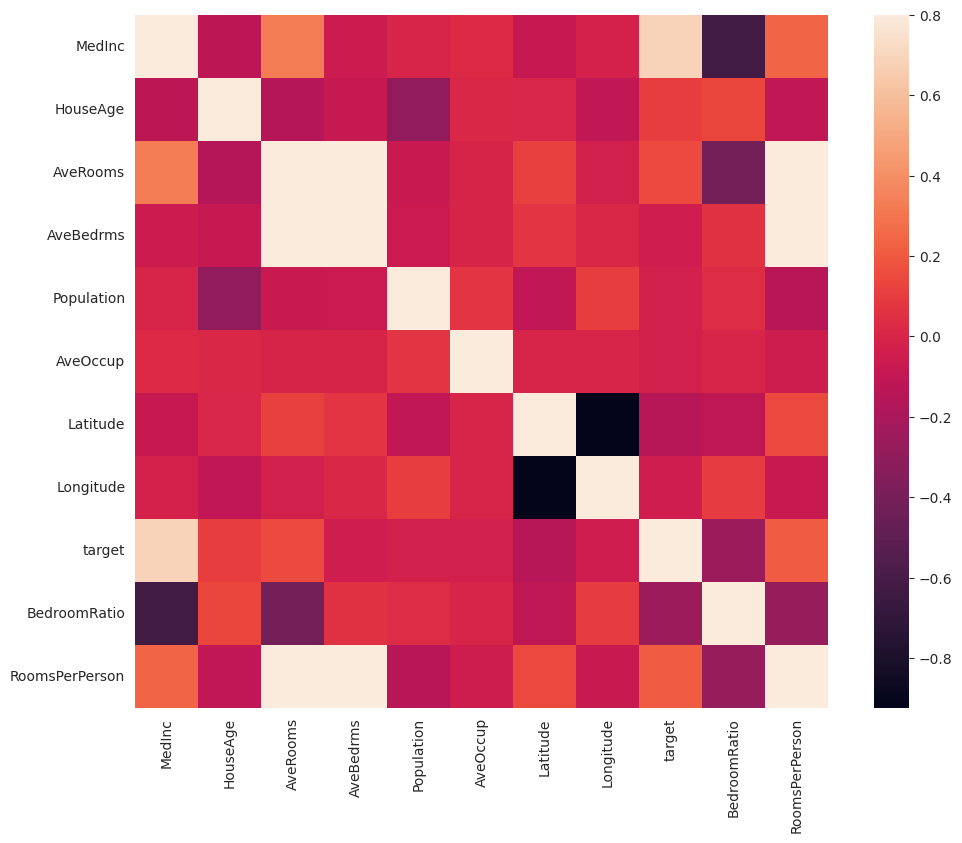

In [32]:
corrmatrix = housing_copy.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmatrix, vmax=.8,square = True)

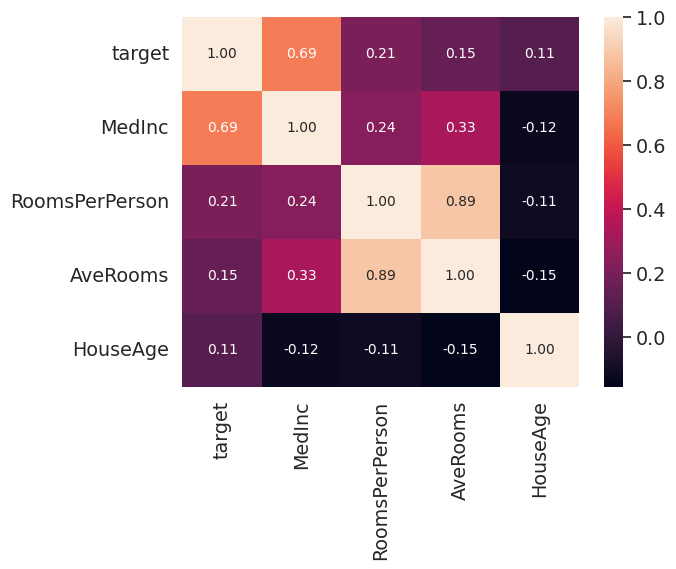

In [36]:
cols = corrmatrix.nlargest(5,'target')['target'].index
cm = np.corrcoef(housing_copy[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot = True, fmt='.2f', annot_kws={'size' :10}, yticklabels=cols.values, xticklabels = cols.values)
plt.show()

<ipython-input-42-b4bc25949ac0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_df['target'], fit = stats.norm)


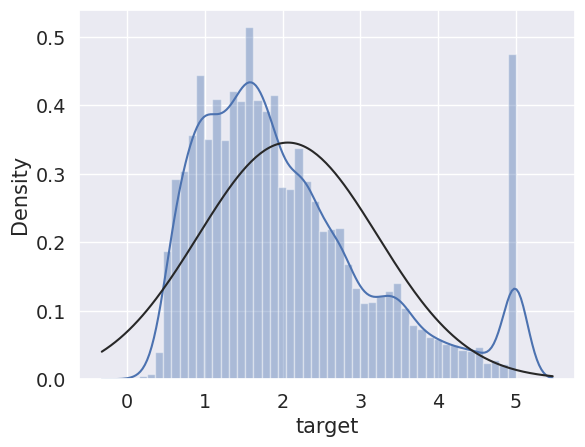

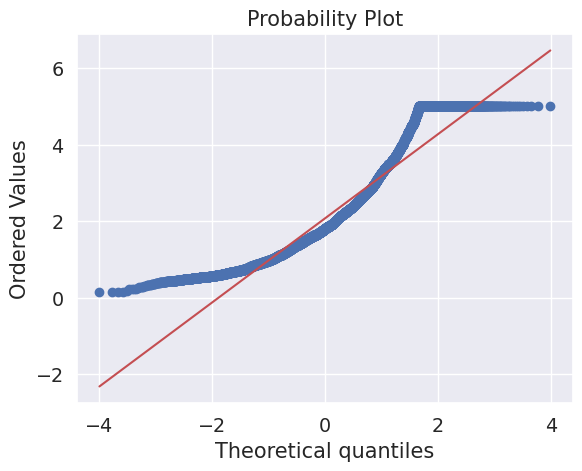

In [42]:
from scipy import stats
from scipy.stats import norm,skew
sns.distplot(housing_df['target'], fit = stats.norm)
fig = plt.figure()
res = stats.probplot(housing_df['target'], plot = plt)

positive skewness -> log transformation

<ipython-input-43-d95bfd12cf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target,fit = stats.norm)


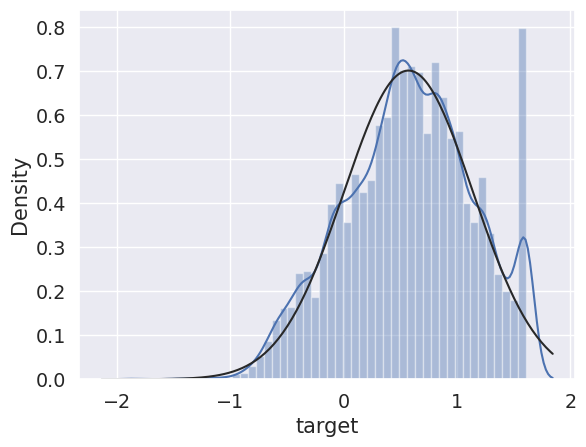

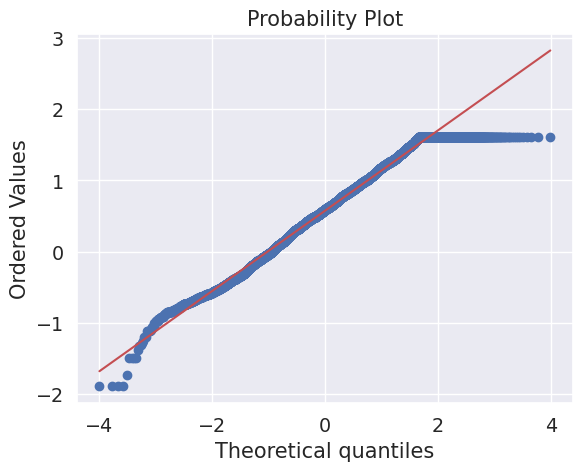

In [43]:
target = housing_df['target'].copy()
target = np.log(target)
sns.distplot(target,fit = stats.norm)
fit = plt.figure()
res = stats.probplot(target, plot = plt)

<ipython-input-54-2fc479aa3e66>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_copy[label], fit = stats.norm)


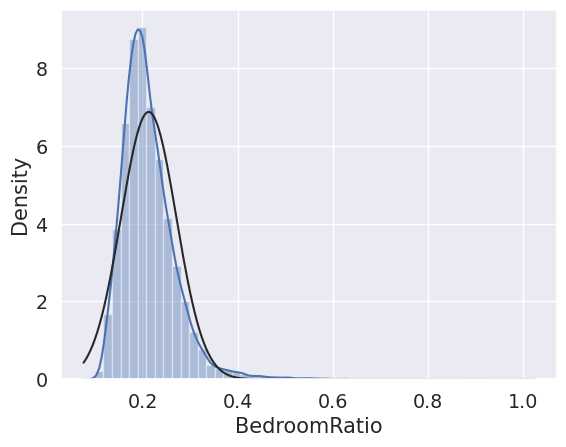

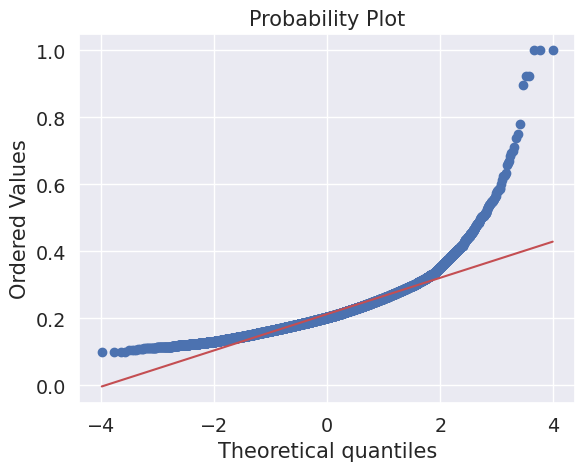

In [54]:
label = 'BedroomRatio'
sns.distplot(housing_copy[label], fit = stats.norm)
fig = plt.figure()
res = stats.probplot(housing_copy[label], plot = plt)

<ipython-input-55-2e778c4ada47>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target,fit = stats.norm)


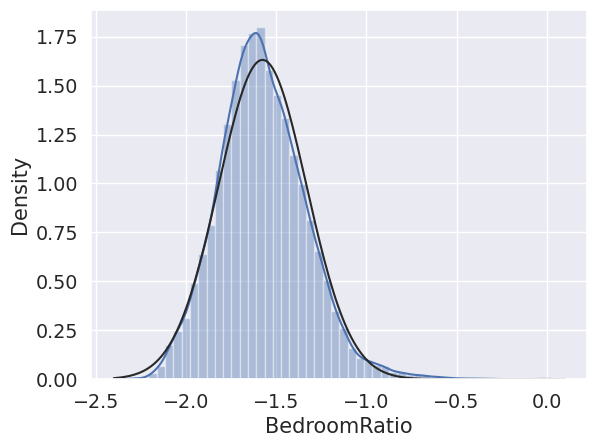

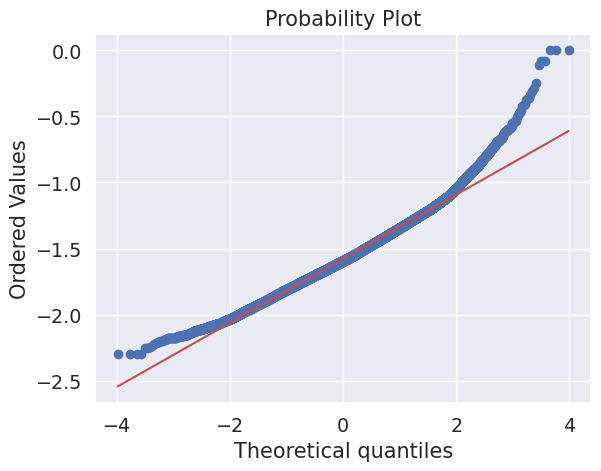

In [55]:
target = housing_copy[label].copy()
target = np.log(target)
sns.distplot(target,fit = stats.norm)
fit = plt.figure()
res = stats.probplot(target, plot = plt)

**TRAINING**

In [5]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

def column_ratio(X):
  if isinstance(X, pd.DataFrame):
    X = X.values
  return X[:,[0]]/X[:,[1]]
def ratio_name(function_transformer, feature_names_in):
  return ['ratio']
def ratio_pipeline():
  return make_pipeline(FunctionTransformer(column_ratio, feature_names_out=ratio_name),
                       StandardScaler())

In [6]:
log_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log, feature_names_out='one-to-one')),
     ('scale', StandardScaler()),
])
default_pipeline = Pipeline([
    ('scale', StandardScaler()),
])
preprocessing = ColumnTransformer([
    ("log", log_pipeline,["MedInc", "AveBedrms", "AveRooms"]),
    ("BedrmsRatio", ratio_pipeline(), ["AveBedrms", "AveRooms"]),
    ("RoomsPerPers", ratio_pipeline(), ["AveRooms", "AveOccup"]),
], remainder=default_pipeline)

In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

model_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('svr', SVR(kernel='rbf'))
])

In [98]:
rnd_X = X_train.sample(5000,random_state=42)
indexes = rnd_X.index
rnd_y = y_train[indexes]

In [99]:
from scipy.stats import randint, uniform
rnd_distrib = {
    'svr__C': [0.001,0.01,0.1,1,100,1000],
    'svr__gamma': uniform(0.001,0.1),
    'svr__kernel': ['rbf', 'linear', 'sigmoid', 'poly'],
    'svr__degree': randint(low=1,high=8),
}

In [100]:
#run only once, takes a lot of time
rnd_search = RandomizedSearchCV(model_pipeline, rnd_distrib, n_iter=10,scoring="neg_mean_squared_error", random_state=42,cv=5)
rnd_search.fit(rnd_X,rnd_y)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('scale',
                                                                                           StandardScaler())]),
                                                                transformers=[('BedrmsRatio',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x7c5c4acd13a0>,
                                                                                                                    func=<function column_ratio at 0x7c5c4acd11c0>)),
                                                                                               ('standardscaler',
                                                                                                Sta...
                                             ('svr', SVR())]),
                   param_distributions={'svr__C': [0.001, 0.01, 0.1, 1, 100,
                                                   1000],
                                        'svr__degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c5c4a7a4790>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c5c493ef290>,
                                        'svr__kernel': ['rbf', 'linear',
                                                        'sigmoid', 'poly']},
                   random_state=42, scoring='neg_mean_squared_error')

In [104]:
rnd_search.best_params_

{'svr__C': 1000,
 'svr__degree': 5,
 'svr__gamma': np.float64(0.04419450186421158),
 'svr__kernel': 'rbf'}

In [9]:
best_params = {'svr__C': 1000,
 'svr__degree': 5,
 'svr__gamma': np.float64(0.04419450186421158),
 'svr__kernel': 'rbf'}

In [102]:
#run only once
model = rnd_search.best_estimator_
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('scale',
                                                              StandardScaler())]),
                                   transformers=[('BedrmsRatio',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7c5c4acd13a0>,
                                                                                       func=<function column_ratio at 0x7c5c4acd11c0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AveBedrms', 'Ave...
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7c5c4acd13a0>,
                                                                                       func=<function column_ratio at 0x7c5c4acd11c0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AveRooms', 'AveOccup']),
                                                 ('log',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'AveBedrms',
                                                   'AveRooms'])])),
                ('svr',
                 SVR(C=1000, degree=5, gamma=np.float64(0.04419450186421158)))])

In [10]:
model_pipeline.set_params(**best_params)
model_pipeline.fit(X_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('scale',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'AveBedrms',
                                                   'AveRooms']),
                                                 ('BedrmsRatio',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTra...
                                                                   StandardScaler())]),
                                                  ['AveBedrms', 'AveRooms']),
                                                 ('RoomsPerPers',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7828ca2cc5e0>,
                                                                                       func=<function column_ratio at 0x7828ca2cc900>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AveRooms', 'AveOccup'])])),
                ('svr',
                 SVR(C=1000, degree=5, gamma=np.float64(0.04419450186421158)))])

In [12]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error
model = model_pipeline
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print("RMSE: ", rmse)
print("MSE: ", mse)

RMSE:  0.5810733730645454
MSE:  0.33764626488460836


In [116]:
y_test[:5]

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000


In [117]:
y_pred[:5]

array([0.40763951, 1.34951866, 5.57148739, 2.36727771, 2.82949923])

**TRYING OUT VISUALIZATION**

In [22]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

X_plot = X_train.sample(4000)
indexes = X_plot.index
y_plot = y_train[indexes]

plot_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('pca', PCA(n_components=2)),
])

X_plot = plot_pipeline.fit_transform(X_plot)
df_res = pd.DataFrame(X_plot, columns = ['PC1', 'PC2'])
df_res['ground_truth'] = y_plot

plot_model = SVR(C = best_params['svr__C'], kernel = 'poly',
                 gamma = best_params['svr__gamma'], degree = best_params['svr__degree'])

plot_model.fit(X_plot,y_plot)


SVR(C=1000, degree=5, gamma=np.float64(0.04419450186421158), kernel='poly')

/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  npdtype = np.dtype(dtype)


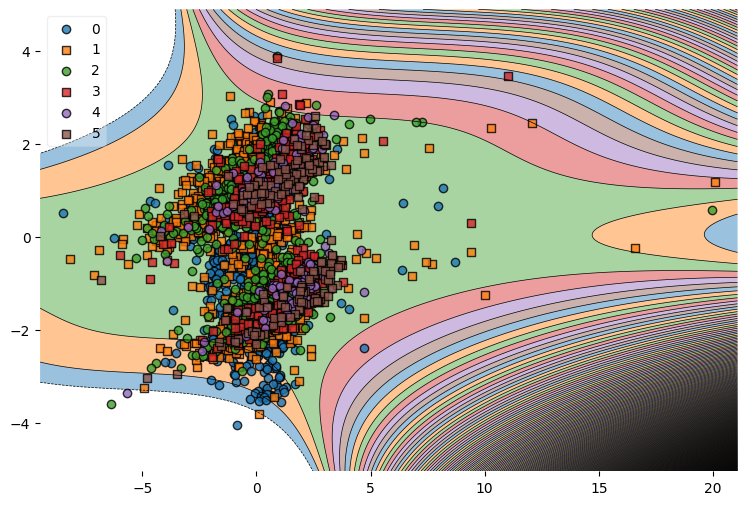

In [23]:
fig, ax = plt.subplots(figsize=(9,6))
plot_decision_regions(X_plot, y_plot.astype(np.integer).to_numpy(), clf=plot_model, markers='os',legend=2)
plt.show()